In [7]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np


In [8]:
iris = datasets.load_iris()

In [9]:
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

In [10]:
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [11]:
#colormap = np.array(['red', 'lime', 'black'])

In [12]:
model = KMeans(n_clusters=3)
model.fit(X)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [13]:
plt.figure(figsize=(14,7))

<Figure size 1008x504 with 0 Axes>

<Figure size 1008x504 with 0 Axes>

In [14]:
colormap = np.array(['red', 'lime', 'black'])

Text(0.5,1,'Real Classification')

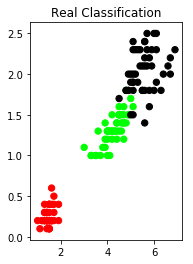

In [15]:
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')

Text(0.5,1,'K Mean Classification')

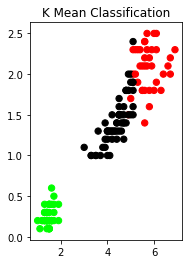

In [16]:
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')

In [17]:
plt.figure(figsize=(14,7))


<Figure size 1008x504 with 0 Axes>

<Figure size 1008x504 with 0 Axes>

In [18]:
predY = np.choose(model.labels_, [0, 1, 2]).astype(np.int64)
print (predY)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


Text(0.5,1,'K Mean Classification')

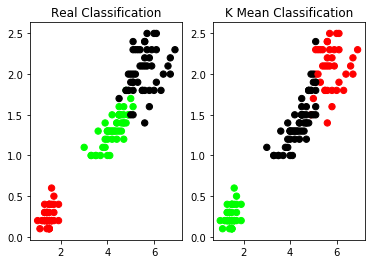

In [19]:
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[predY], s=40)
plt.title('K Mean Classification')

In [20]:
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean: ',sm.confusion_matrix(y, model.labels_))

The accuracy score of K-Mean:  0.09333333333333334
The Confusion matrixof K-Mean:  [[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]


In [21]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)

In [22]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [23]:
y_cluster_gmm = gmm.predict(xs)

Text(0.5,1,'GMM Classification')

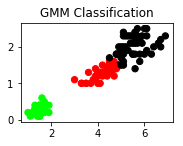

In [24]:
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_cluster_gmm], s=40)
plt.title('GMM Classification')

In [25]:
print('The accuracy score of EM: ',sm.accuracy_score(y, y_cluster_gmm))
print('The Confusion matrix of EM: ',sm.confusion_matrix(y, y_cluster_gmm))

The accuracy score of EM:  0.3333333333333333
The Confusion matrix of EM:  [[ 0 50  0]
 [45  0  5]
 [ 0  0 50]]
